In [1]:
import pandas as pd
import sys
import os
import pickle
import numpy as np


from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap 
import seaborn as sns


color1='black'
color2='forestgreen'
color3='mediumblue'
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', [color2,color1])

In [2]:
filepath = '../data/events_ml.csv' 
df = pd.read_csv(filepath) 
df.head()

,product_id,category_id,brand,last_view_before_cart,already_in_cart,time_of_day,day_of_week,month,price_range,code1,code2,code3,time_since_last_view_binned,last_view_before_purchase
0,4101974,2144415939364389423,honor,0,0,11:00:00,Thursday,2020-10,50-100,electronics,clocks,unknown,NaN,0
1,3506650,2144415935673401802,kester,0,0,06:00:00,Tuesday,2020-10,10-50,Unknown,unknown,unknown,NaN,0
2,124883,2144415924424278172,logitech,0,0,08:00:00,Monday,2020-11,10-50,electronics,audio,acoustic,NaN,0
3,other,2144415924424278172,logitech,0,0,09:00:00,Monday,2020-11,10-50,electronics,audio,acoustic,NaN,0
4,254763,2144415924424278172,creative,0,0,10:00:00,Wednesday,2020-11,50-100,electronics,audio,acoustic,NaN,0


In [3]:
#convert all columns to object
int_columns = df.select_dtypes(include='int64').columns
df[int_columns] = df[int_columns].astype('object')
print(df.dtypes)
#creating a second dataframe with the last_view_before_cart column removed
df2 = df.drop('last_view_before_cart', axis=1)

product_id                     object
category_id                    object
brand                          object
last_view_before_cart          object
already_in_cart                object
time_of_day                    object
day_of_week                    object
month                          object
price_range                    object
code1                          object
code2                          object
code3                          object
time_since_last_view_binned    object
last_view_before_purchase      object
dtype: object


# Creating X and y

In [4]:
y = df.pop('last_view_before_purchase').astype('int')
X = df

### Converting X into an array of integers

In [5]:
X.sample(5)

,product_id,category_id,brand,last_view_before_cart,already_in_cart,time_of_day,day_of_week,month,price_range,code1,code2,code3,time_since_last_view_binned
106727,3829355,2144415922528452715,Unknown,0,0,07:00:00,Wednesday,2020-10,10-50,electronics,telephone,unknown,NaN
420228,1717258,2144415938206761488,ekf,0,0,12:00:00,Saturday,2020-12,50-100,Unknown,unknown,unknown,NaN
729297,1270518,2144415942568837766,ion,0,0,14:00:00,Saturday,2021-02,100-200,Unknown,unknown,unknown,NaN
469319,3959577,2144415922402623591,philips,1,0,16:00:00,Thursday,2020-12,200-500,computers,peripherals,monitor,<5 min
772360,227109,2144415921505042512,palmexx,0,0,13:00:00,Tuesday,2021-02,10-50,Unknown,unknown,unknown,NaN


In [6]:
X_encoded = X.copy() # saving a copy for later

label_encoders = {}
for column in X.columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column]) #each column is transformed to a number
    label_encoders[column] = le


In [7]:
label_encoders #storing the label encoder for each column

{'product_id': LabelEncoder(),
 'category_id': LabelEncoder(),
 'brand': LabelEncoder(),
 'last_view_before_cart': LabelEncoder(),
 'already_in_cart': LabelEncoder(),
 'time_of_day': LabelEncoder(),
 'day_of_week': LabelEncoder(),
 'month': LabelEncoder(),
 'price_range': LabelEncoder(),
 'code1': LabelEncoder(),
 'code2': LabelEncoder(),
 'code3': LabelEncoder(),
 'time_since_last_view_binned': LabelEncoder()}

In [8]:
X = X.values
X

array([[12479,   379,   369, ...,    11,    66,     7],
       [ 8441,   312,   464, ...,    39,    66,     7],
       [ 1641,    78,   514, ...,     1,     0,     7],
       ...,
       [ 5118,   138,   827, ...,    40,    63,     7],
       [13143,   379,    34, ...,    11,    66,     7],
       [19022,    19,     0, ...,    36,    66,     7]])

### Scaling

In [9]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

### Creating the test and train dataset

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

In [11]:
print(f'100% of our data: {len(df)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 793099.
70% for training data: 555169.
30% for test data: 237930.


# Baseline Model
## Logistic Regression

In [12]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [13]:
predictions = model.predict(X_test)

In [14]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    229414
           1       0.53      0.19      0.28      8516

    accuracy                           0.96    237930
   macro avg       0.75      0.59      0.63    237930
weighted avg       0.95      0.96      0.96    237930



In [15]:
cm = confusion_matrix(y_test, predictions)

<Figure size 800x600 with 0 Axes>

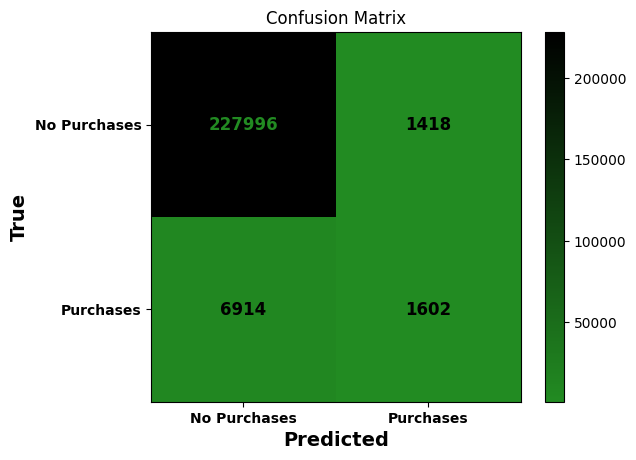

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

plt.figure(figsize=(8, 6))
disp.plot(cmap=custom_cmap)
plt.title('Confusion Matrix')
plt.xlabel('Predicted', fontdict={'fontsize': 14, 'fontweight': 'bold'}) 
plt.ylabel('True', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xticks([0, 1], ['No Purchases', 'Purchases'], fontdict={'fontsize': 10, 'fontweight': 'bold'})
plt.yticks([0, 1], ['No Purchases', 'Purchases'], fontdict={'fontsize': 10, 'fontweight': 'bold'})  
for text in disp.text_.ravel():
    text.set_fontweight('bold')
    text.set_fontsize(12)  

plt.savefig("../images/log_reg_confusion_matrix.png")
plt.show()

### Precision
Precision means including the cost of the False Positives, in our case TP/(TP+FP) that would mean (1602/(1602+1418)).
In order to attain the 1602 purchases, the system would select 1602+1418 views as relevant.

In [17]:
# calcuate the precision_score
precision = precision_score(y_test, predictions)
print(f'Precision: {precision:.2f}')

Precision: 0.53


In other words: Out of 100 selected views, only 53 lead to purchases

In [18]:
# save the model
filename = '../models/log_reg1.pkl'
pickle.dump(model, open(filename, 'wb'))

Double-checking 0 and 1 was equally distributed in y_train and y_test

In [19]:
# calculate percentage of value counts for y_test
y_test_percentage = y_test.value_counts(normalize=True) * 100
print("y_test percentages:")
print(y_test_percentage)


# calculate percentage of value counts for y_train
y_train_percentage = y_train.value_counts(normalize=True) * 100
print("y_train percentages:")
print(y_train_percentage)

y_test percentages:
last_view_before_purchase
0    96.420796
1     3.579204
Name: proportion, dtype: float64
y_train percentages:
last_view_before_purchase
0    96.425593
1     3.574407
Name: proportion, dtype: float64


In both cases the 1 case was present with nearly 4 %. This means our target value was equally distributed among train and test.

### Changing the threshold for predictions

In [20]:
probabilities = model.predict_proba(X_test)

In [21]:
custom_threshold = 0.36
predictions = (probabilities[:, 1] >= custom_threshold).astype(int)

<Figure size 800x600 with 0 Axes>

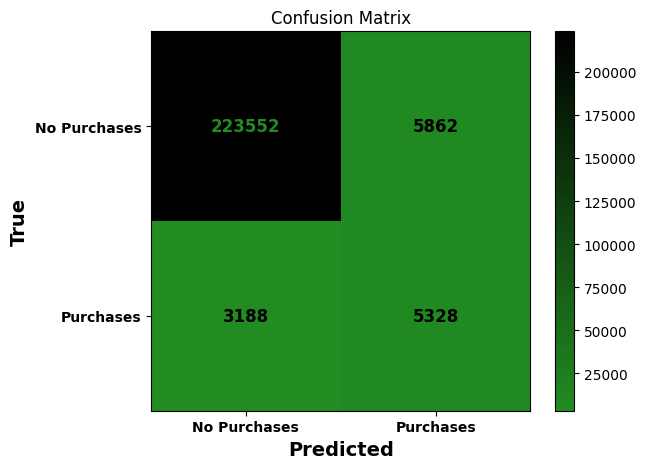

In [22]:
# print confusion matrix for Random Forest Classifier without cheating
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

plt.figure(figsize=(8, 6))
disp.plot(cmap=custom_cmap)
plt.title('Confusion Matrix')
plt.xlabel('Predicted', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('True', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xticks([0, 1], ['No Purchases', 'Purchases'], fontdict={'fontsize': 10, 'fontweight': 'bold'})
plt.yticks([0, 1], ['No Purchases', 'Purchases'], fontdict={'fontsize': 10, 'fontweight': 'bold'})
for text in disp.text_.ravel():
    text.set_fontweight('bold')
    text.set_fontsize(12)  

plt.tight_layout()
plt.show()

In [23]:
# calcuate the precision_score
precision = precision_score(y_test, predictions)
print(f'Precision: {precision:.2f}')

Precision: 0.48


Interesting: Precision went down but recall went up. Recall is the % of positive cases detected and this is definitely in our favor.

### Checking the feature coefficients

In [24]:
# get all feature names before the transformation
feature_names = X_encoded.columns.tolist()
# extract and order coefficients from highest to lowest
coefficients = model.coef_[0]
sorted_features = sorted(zip(feature_names, coefficients), key=lambda x: abs(x[1]), reverse=True)
# print the ordered coefficients
print("Ordered Coefficients:")
for feature, coef in sorted_features:
    print(f"Feature: {feature}, Coefficient: {coef}")

Ordered Coefficients:
Feature: last_view_before_cart, Coefficient: 1.2074983992953034
Feature: time_since_last_view_binned, Coefficient: -0.3111332512773679
Feature: already_in_cart, Coefficient: 0.2676974467514692
Feature: code1, Coefficient: 0.11642243046012025
Feature: price_range, Coefficient: -0.09691441552894858
Feature: code2, Coefficient: 0.08120572660508246
Feature: time_of_day, Coefficient: -0.05359658621487112
Feature: code3, Coefficient: 0.04108297121553865
Feature: product_id, Coefficient: -0.03924664707300539
Feature: category_id, Coefficient: -0.022572684328481883
Feature: brand, Coefficient: 0.006815684947223561
Feature: month, Coefficient: 0.004044652281304473
Feature: day_of_week, Coefficient: -0.0010394876917660992


In [25]:
# Decode the label for interpretation using column names from label_encoders
print("\nLabel Encodings:")
for column, le in label_encoders.items():
    classes = le.classes_
    print(f"{column} encoding: {dict(zip(range(len(classes)), classes))}")



Label Encodings:
product_id encoding: {0: '1000108', 1: '1000111', 2: '1000112', 3: '1000113', 4: '1000116', 5: '1000175', 6: '1002511', 7: '1002524', 8: '1002525', 9: '1002528', 10: '1002530', 11: '1002548', 12: '1002553', 13: '1002558', 14: '1002560', 15: '1003742', 16: '1003994', 17: '1004057', 18: '1004134', 19: '1004135', 20: '1004188', 21: '1004220', 22: '1004224', 23: '1004228', 24: '1004249', 25: '1004284', 26: '1004311', 27: '1004316', 28: '1004327', 29: '1004329', 30: '1004335', 31: '1004357', 32: '1004362', 33: '1004393', 34: '1004394', 35: '1004419', 36: '1004469', 37: '1004484', 38: '1004493', 39: '1004498', 40: '1004505', 41: '1004552', 42: '1004582', 43: '1004598', 44: '1004613', 45: '1004617', 46: '1004625', 47: '1004626', 48: '1004824', 49: '1004850', 50: '1004851', 51: '1004879', 52: '1004923', 53: '1005146', 54: '1005175', 55: '1005189', 56: '1005424', 57: '1005425', 58: '1005426', 59: '1005473', 60: '1005545', 61: '1005891', 62: '1006506', 63: '1006509', 64: '10065

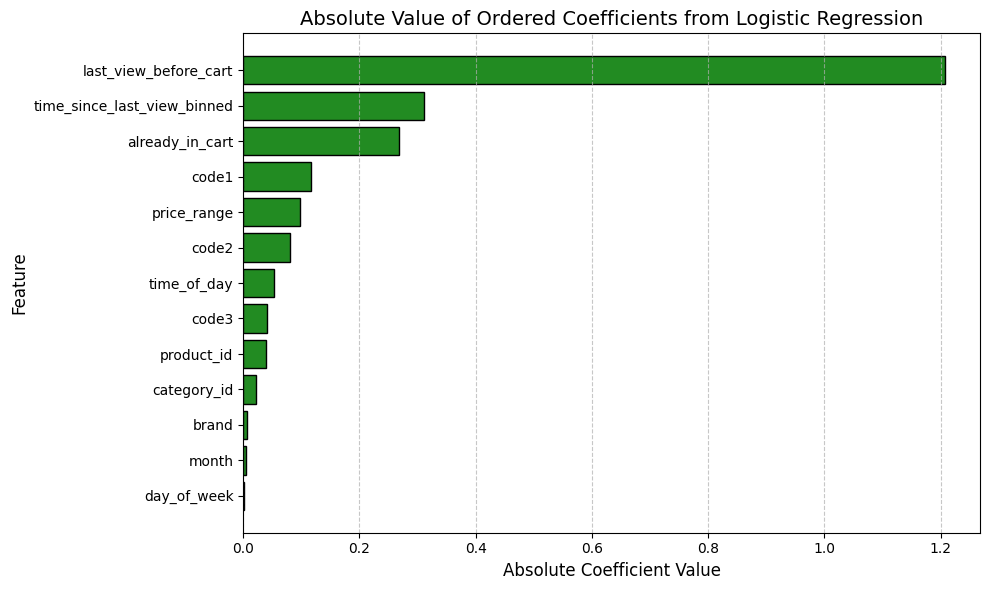

In [26]:
# plot the absolute value of the ordered coefficients
features, coefficients = zip(*sorted_features)
absolute_coefficients = [abs(coef) for coef in coefficients]

plt.figure(figsize=(10, 6))
plt.barh(features, absolute_coefficients, color=color2, edgecolor='black')
plt.xlabel('Absolute Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Absolute Value of Ordered Coefficients from Logistic Regression', fontsize=14)
plt.gca().invert_yaxis()  # invert y-axis to show the highest coefficient at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("../images/absolute_ordered_coefficients.png")
plt.show()

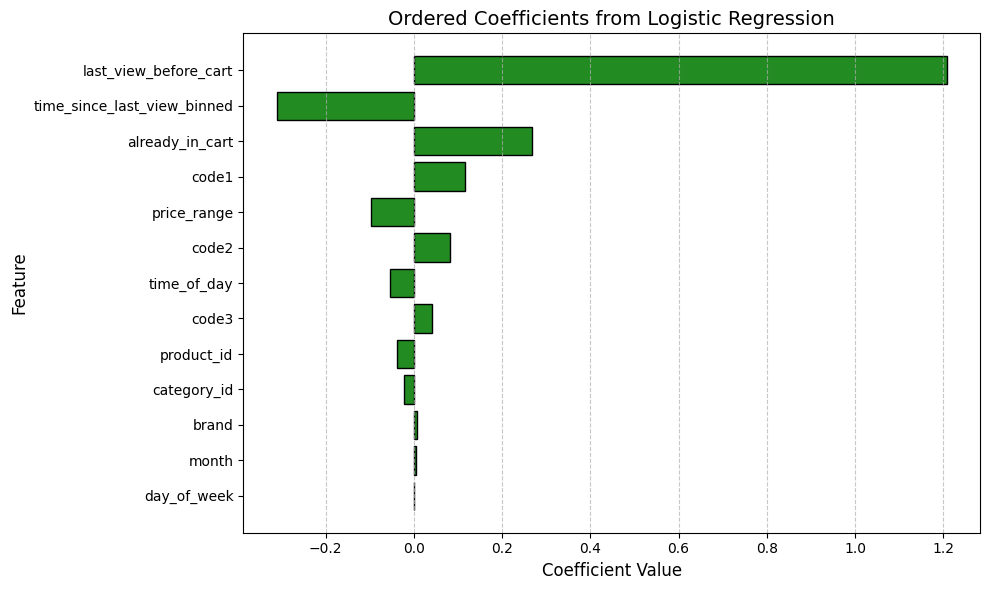

In [27]:
# Plot the ordered coefficients
features, coefficients = zip(*sorted_features)
plt.figure(figsize=(10, 6))
plt.barh(features, coefficients, color=color2, edgecolor='black')
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Ordered Coefficients from Logistic Regression', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to show the highest coefficient at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("../images/ordered_coefficients.png")
plt.show()

## Trying other Models

For the other models we directly focus on our key KPI which is precision.
Why Precision? Precision takes into account the cost of False Positives. In our example we have to pay for all ad slots that the system marked as positive.

In [28]:
def calculate_models_precision(X_train, y_train, X_test, y_test, model_object, modelName, doPrint=True):
    model_object.fit(X_train, y_train)
    y_pred = model_object.predict(X_test)
    precision = precision_score(y_test, y_pred)
    if doPrint:
        print(f"{modelName} Precision: {precision:.4f}")
    return precision     
   

In [29]:
# Logistic regression model
log_reg_precision = calculate_models_precision(X_train, y_train, X_test, y_test, 
                                       LogisticRegression(max_iter=1000), "Logistic Regression")
# Gradient Boosting Classifier
gbc_precision = calculate_models_precision(X_train, y_train, X_test, y_test, 
                                       GradientBoostingClassifier(), "Gradient Boosting Classifier")
# Random Forest Classifier               
rfc_precision = calculate_models_precision(X_train, y_train, X_test, y_test, 
                                       RandomForestClassifier(), "Random Forest Classifier")

Logistic Regression Precision: 0.5305
Gradient Boosting Classifier Precision: 0.5691
Random Forest Classifier Precision: 0.4980


# Without Cheating
As you might have noticed, the dataframe used above includes "last_view_before_cart" column. This column is highly important to predict future purchases. On view level, we do not have this information of the next event (whether it be cart or purchase). For this reason, we do not include that column anymore

In [30]:
df2 #new dataframe without the last_view_before_cart column

,product_id,category_id,brand,already_in_cart,time_of_day,day_of_week,month,price_range,code1,code2,code3,time_since_last_view_binned,last_view_before_purchase
0,4101974,2144415939364389423,honor,0,11:00:00,Thursday,2020-10,50-100,electronics,clocks,unknown,NaN,0
1,3506650,2144415935673401802,kester,0,06:00:00,Tuesday,2020-10,10-50,Unknown,unknown,unknown,NaN,0
2,124883,2144415924424278172,logitech,0,08:00:00,Monday,2020-11,10-50,electronics,audio,acoustic,NaN,0
3,other,2144415924424278172,logitech,0,09:00:00,Monday,2020-11,10-50,electronics,audio,acoustic,NaN,0
4,254763,2144415924424278172,creative,0,10:00:00,Wednesday,2020-11,50-100,electronics,audio,acoustic,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
793094,3829355,2144415922528452715,Unknown,0,23:00:00,Sunday,2021-02,10-50,electronics,telephone,unknown,NaN,0
793095,953226,2144415927553229037,Unknown,0,23:00:00,Sunday,2021-02,200-500,Unknown,unknown,unknown,NaN,0
793096,1715907,2144415927049912542,starwind,0,23:00:00,Sunday,2021-02,50-100,electronics,video,tv,NaN,0
793097,4170534,2144415939364389423,amazfit,0,23:00:00,Sunday,2021-02,50-100,electronics,clocks,unknown,NaN,0


## New X and y

In [31]:
y = df2.pop('last_view_before_purchase').astype('int')
X = df2

In [32]:
X_encoded = X.copy() # saving a copy for later

label_encoders = {}
for column in X.columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column]) #each column is transformed to a number
    label_encoders[column] = le

X = X.values
scaler = StandardScaler()
X_normalised = scaler.fit_transform(X)
# set up x and y for test and train split
X_train, X_test, y_train, y_test = train_test_split(X_normalised, y, test_size=0.3, random_state=42)

In [33]:
# Logistic regression model
log_reg_precision2 = calculate_models_precision(X_train, y_train, X_test, y_test, 
                                       LogisticRegression(max_iter=1000), "Logistic Regression")
# Gradient Boosting Classifier
gbc_precision2 = calculate_models_precision(X_train, y_train, X_test, y_test, 
                                       GradientBoostingClassifier(), "Gradient Boosting Classifier")
# Random Forest Classifier               
rfc_precision2 = calculate_models_precision(X_train, y_train, X_test, y_test, 
                                       RandomForestClassifier(), "Random Forest Classifier")

/opt/anaconda3/envs/computer_vision/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression Precision: 0.0000
Gradient Boosting Classifier Precision: 0.3333
Random Forest Classifier Precision: 0.1473


## Best Model: Random Forest Classifier

In [34]:
feature_names = X_encoded.columns.tolist()  # Use column names directly if X is a DataFrame

In [35]:
# train the RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort indices of importances in descending order

# print feature importances
print("Feature Importances:")
for i in indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")


Feature Importances:
time_of_day: 0.2753
product_id: 0.2269
day_of_week: 0.1492
month: 0.1124
brand: 0.0639
time_since_last_view_binned: 0.0544
category_id: 0.0453
price_range: 0.0284
already_in_cart: 0.0147
code3: 0.0119
code2: 0.0105
code1: 0.0070


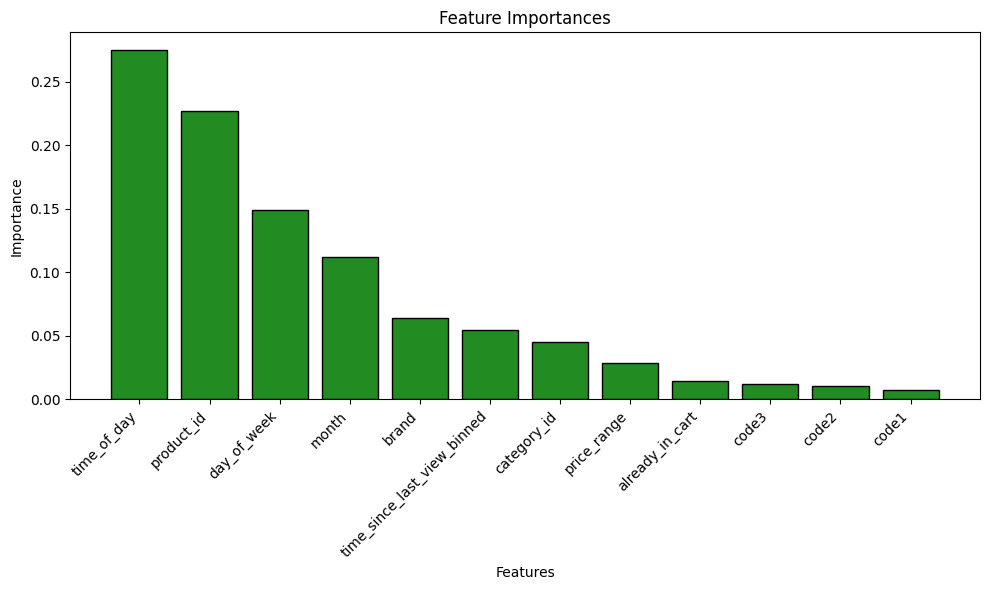

In [36]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center", color=color2, edgecolor='black')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45, ha='right')  
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [37]:
# print all KPI for the latest Random Forest Classifier
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    229414
           1       0.15      0.04      0.06      8516

    accuracy                           0.96    237930
   macro avg       0.56      0.51      0.52    237930
weighted avg       0.94      0.96      0.95    237930



<Figure size 800x600 with 0 Axes>

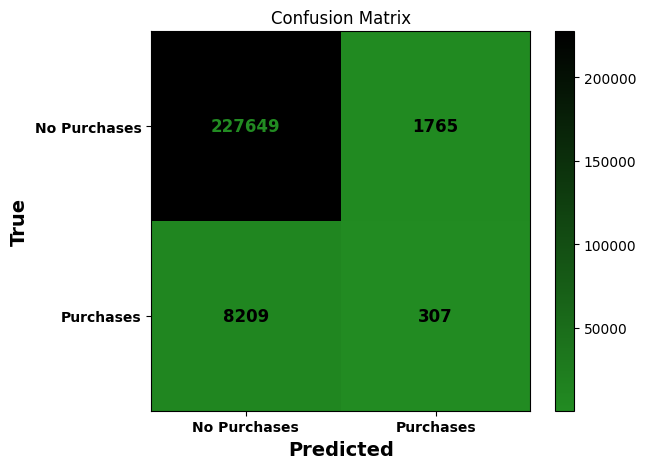

In [38]:
# print confusion matrix for Random Forest Classifier without cheating
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

plt.figure(figsize=(8, 6))
disp.plot(cmap=custom_cmap)
plt.title('Confusion Matrix')
plt.xlabel('Predicted', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('True', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xticks([0, 1], ['No Purchases', 'Purchases'], fontdict={'fontsize': 10, 'fontweight': 'bold'})
plt.yticks([0, 1], ['No Purchases', 'Purchases'], fontdict={'fontsize': 10, 'fontweight': 'bold'})
for text in disp.text_.ravel():
    text.set_fontweight('bold')
    text.set_fontsize(12)  

plt.tight_layout()
plt.show()

### Cross validation
Cross validation is about splitting train and test differently throughout the whole dataset and to rotate so that each line is one train and one test.

In [39]:
# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='precision')

# Print the cross-validation scores and their mean
print("Cross-validation scores:", cv_scores)
print(f"Mean cross-validation precision: {cv_scores.mean():.4f}")

Cross-validation scores: [0.13333333 0.18372093 0.15212528 0.14702703 0.14399093]
Mean cross-validation precision: 0.1520
